# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1086.
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           1.11e-42
Time:                        00:46:59   Log-Likelihood:                 5.2529
No. Observations:                  50   AIC:                            -2.506
Df Residuals:                      46   BIC:                             5.142
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9475      0.077     63.913      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.40076859  4.89471316  5.34870163  5.73543165  6.03745418  6.25004025
  6.38195795  6.45403186  6.49572161  6.54028175  6.61929814  6.75749846
  6.96868956  7.25348897  7.59922351  7.98201139  8.37068599  8.73191641
  9.03568362  9.26021255  9.39554966  9.44519824  9.42554287  9.36315748
  9.29043931  9.24028613  9.24069126  9.31014431  9.45459342  9.66646798
  9.92592247 10.204097   10.46785895 10.68524653 10.83072002 10.88935787
 10.8593083  10.75209349 10.59071657 10.40588222 10.23095203 10.09646324
 10.02511159 10.02802246 10.102923   10.23451556 10.39699104 10.55826926
 10.68526966 10.74934629]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.71450579 10.54646577 10.2648723   9.91449632  9.55427211  9.24286816
  9.02432306  8.91726331  8.91034293  8.96502133]


## Plot comparison

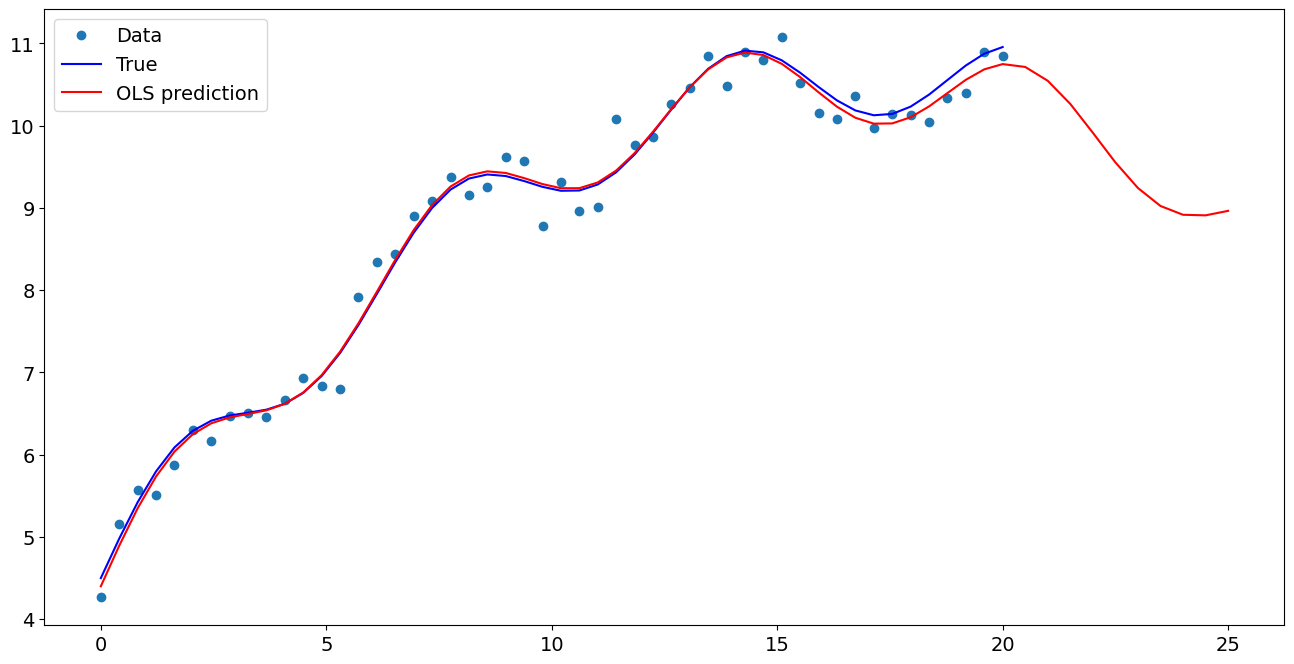

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.947463
x1                  0.513239
np.sin(x1)          0.500968
I((x1 - 5) ** 2)   -0.021868
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.714506
1    10.546466
2    10.264872
3     9.914496
4     9.554272
5     9.242868
6     9.024323
7     8.917263
8     8.910343
9     8.965021
dtype: float64